<a href="https://colab.research.google.com/github/mjksill/CP540-online/blob/main/notebooks/Pandas_2_Plotting_GridWatch_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Data and Dealing with Dates in Pandas

Previously we have seen how to import simple data using `pandas`. This worksheet will follow a similar trend, introducing other ways to manipulate the data we import, and show how it can recognise dates. 

We're going to use data from this [site](https://www.gridwatch.templar.co.uk/). You can play around with the types of data available to download from it, but in this case we are going to use [this file](https://) (**Note need to upload file**) which contains data on the UK's energy generation from solar, hydro and wind sources in GW. 

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving weekdata.csv to weekdata.csv


When we import the file, we can also introduce a new piece of useful code. Sometimes in csv files there may be spaces before data or headings, which can lead to commands not being executed properely due to us being unaware of these spaces. Thus, when creating the dataframe, we can include the line of code seen below to remove these type of spaces, and avoid errors. 

In [2]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['weekdata.csv']), skipinitialspace=True)
print(df)

           id            timestamp  wind  hydro        solar
0     1180563  2022-08-24 16:00:42  4244    278  3184.439941
1     1180564  2022-08-24 16:05:44  4244    278  3184.439941
2     1180565  2022-08-24 16:10:44  4163    280  2810.199951
3     1180566  2022-08-24 16:15:56  3954    345  2810.209961
4     1180567  2022-08-24 16:20:39  3879    345  2810.209961
...       ...                  ...   ...    ...          ...
2010  1182573  2022-08-31 15:30:40  5141     93  4663.560059
2011  1182574  2022-08-31 15:35:39  5199     93  4663.560059
2012  1182575  2022-08-31 15:40:47  5199     93  4107.350098
2013  1182576  2022-08-31 15:45:39  5193     93  4107.299805
2014  1182577  2022-08-31 15:50:42  5141     93  4107.299805

[2015 rows x 5 columns]


This is a larger file than we used last time, but it can easily be managed in the same way. It contains data for around 7 days worth of energy generation, recorded at intervals of 5 minutes. To allow us to plot this data and compare it on a daily basis, it can be helpful to categorise it with a different timestamp.

This can be done by importing `datetime` which can be used to recognise and alter dates and times within dataframes. 

In [3]:
from datetime import datetime

df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')  # Firstly we define the current timestamp in its current format
df['timestamp1'] = df['timestamp'].dt.strftime('%d-%m')                     # Here we create a new column in the dataframe for our new timestamp, 
                                                                            # and define the format we want it to take
print(df)                                                                   # This is then applied to each row in the dataframe,
                                                                            # giving us a better alternative to use when creating graphs

           id           timestamp  wind  hydro        solar timestamp1
0     1180563 2022-08-24 16:00:42  4244    278  3184.439941      24-08
1     1180564 2022-08-24 16:05:44  4244    278  3184.439941      24-08
2     1180565 2022-08-24 16:10:44  4163    280  2810.199951      24-08
3     1180566 2022-08-24 16:15:56  3954    345  2810.209961      24-08
4     1180567 2022-08-24 16:20:39  3879    345  2810.209961      24-08
...       ...                 ...   ...    ...          ...        ...
2010  1182573 2022-08-31 15:30:40  5141     93  4663.560059      31-08
2011  1182574 2022-08-31 15:35:39  5199     93  4663.560059      31-08
2012  1182575 2022-08-31 15:40:47  5199     93  4107.350098      31-08
2013  1182576 2022-08-31 15:45:39  5193     93  4107.299805      31-08
2014  1182577 2022-08-31 15:50:42  5141     93  4107.299805      31-08

[2015 rows x 6 columns]


Now we can begin to visualise the data. We can use a simple plot to see a comparison between the 3 types of energy generation. Note that for this plot we use the original timestamp from the dataframe and not the one we have just created.

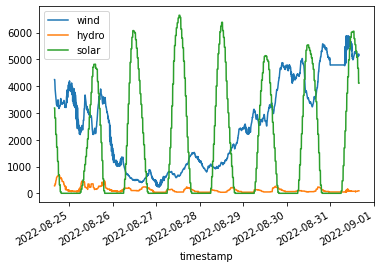

In [4]:
#import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker


df.plot(x="timestamp", y=["wind", "hydro", "solar"])
plt.show()


#help(plt.plot)

Say for example now we want to see how much solar energy is generated each day. We can now use the new timestamp column we created to help us calculate the sum of energy for each day.

['24-08', '25-08', '26-08', '27-08', '28-08', '29-08', '30-08', '31-08']
[60289.42900899999, 393903.851117, 535655.113292, 599808.286935, 529656.955982, 469992.0443800001, 523573.037439, 477107.872335]


Text(0, 0.5, 'Solar Energy Generation (GW)')

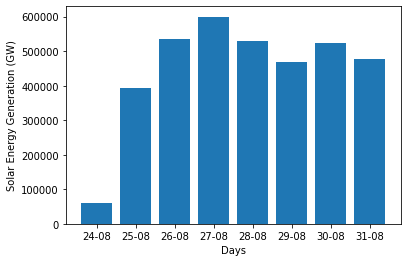

In [5]:
import datetime

start = datetime.datetime.strptime("24-08-2022", "%d-%m-%Y")                   # Firstly we define the first day in our dataframe 
date_generated = pd.date_range(start, periods=8)                               # We can then create a range of dates from this, starting at the inital date stated 
                                                                               # and the following 7 days                     
dates = list(date_generated.strftime("%d-%m"))                                 # We then turn this range into a list to allow us to utilise it
print(dates)

dailysolar = []                                                                # Here we create an empty list to collect the average solar energy for each day

for i in dates:
   dailysolar.append((df.loc[df['timestamp1'] == i, 'solar'].sum()))           # This makes use of the Boolean principles,
                                                                               # and sums all the solar demands from each day, before depositing 
                                                                               # them in the avgsolar list
print(dailysolar)

plt.bar(dates, dailysolar)                                                    # We can then visualise this in a bar graph. 
plt.xlabel("Days")
plt.ylabel("Solar Energy Generation (GW)")

We can also show the split of energy generation in a pie chart.

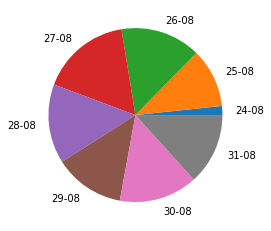

In [6]:
plt.pie(dailysolar, labels=dates, labeldistance=1.15);

plt.show()


We can utilise another python import, `plotly.express`, to show the data of all three types of energy. This import is interesting as it can be used to make interactive graphs. 

In [7]:
import plotly.express as px

fig = px.line(df, x = 'timestamp', y = ['hydro', 'wind', 'solar'],
              labels={
                     "timestamp": "Day",
                     "value": "Energy Generated (GW)",
                     "variable": "Type of Energy"
                 })

fig.show()

This is a simple graph, similar to the one shown previously in this worksheet, but using `plotly.express` allows us to hover over any data point on the graph and see it's value. This can be exapnded on to include filters to show only specific data on the graph, or show scatter graphs. More information on this import can be found [here](https://plotly.com/python/line-charts/).

Violin plots can be used to show the distribution of data in a dataset, so we can use them here to show how the average energy generated per day varies over the course of the week's worth of data we have. For these plots another python import is required - `seaborn`. The code used to generate these plots can be found [here](https://www.python-graph-gallery.com/violin-plot/). It is useful to note that this site contains many more different types of plots and the codes to create them. 

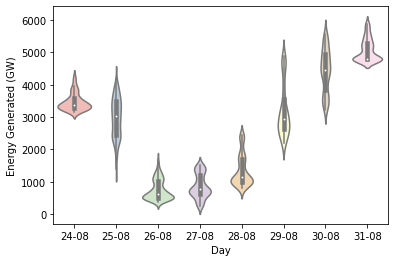

In [8]:
import seaborn as sns
 
ax = sns.violinplot(x=df["timestamp1"], y=df["wind"], palette="Pastel1")

ax.set_ylabel("Energy Generated (GW)")
ax.set_xlabel("Day")


plt.show()

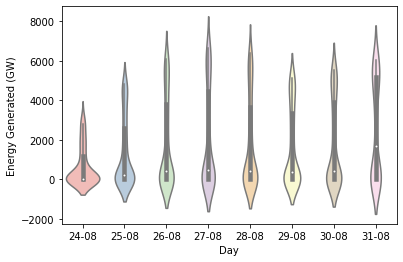

In [9]:
ax = sns.violinplot(x=df["timestamp1"], y=df["solar"], palette="Pastel1")
ax.set_ylabel("Energy Generated (GW)")
ax.set_xlabel("Day")
plt.show()

A note on the above graph - the plot can be seen to go into the negative range. However, there is no negative values in the dataframe. This can be explained by the fact there are values in the data close to or equal to 0. As violin plots use kernel distribution data, this processes the values of '0' in the data and gives a non-zero probability of finding a negative value in the data analysed. It does not mean however that there are negative values in the data. 

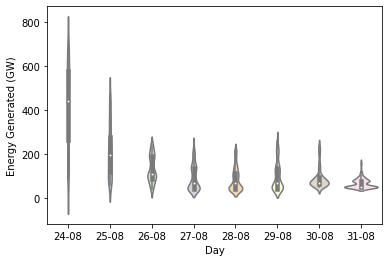

In [10]:
ax = sns.violinplot(x=df["timestamp1"], y=df["hydro"], palette="Pastel1")
ax.set_ylabel("Energy Generated (GW)")
ax.set_xlabel("Day")
plt.show()

### Conclusion

In this worksheet we have seen different type of plots available to us in python using different modules, and how they can be created with pandas dataframes. We have also seen how date values within dataframes can be edited and manipulated to allow us to view data more clearly. 